# House Price Prediction

id , date, price, bedrooms, bathrooms, sqft_living, sqft_lot ,floors,waterfront, view, condition, grade,
       sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15        
 

Based On this columns predict a house price prediction with the help of Linear Regression and sVM.


# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
df=pd.read_csv('Dataset/kc_house_data.csv')

In [3]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# EXploratory data Analysis

In [5]:
df.shape

(21613, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Data Visualization

<Axes: >

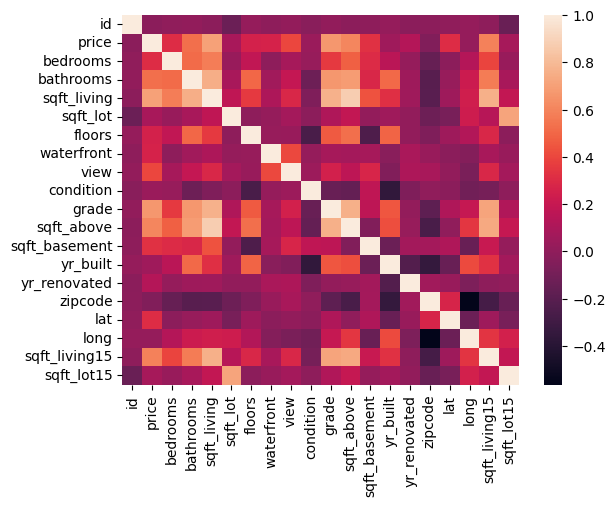

In [11]:
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr)

<Axes: xlabel='bedrooms', ylabel='price'>

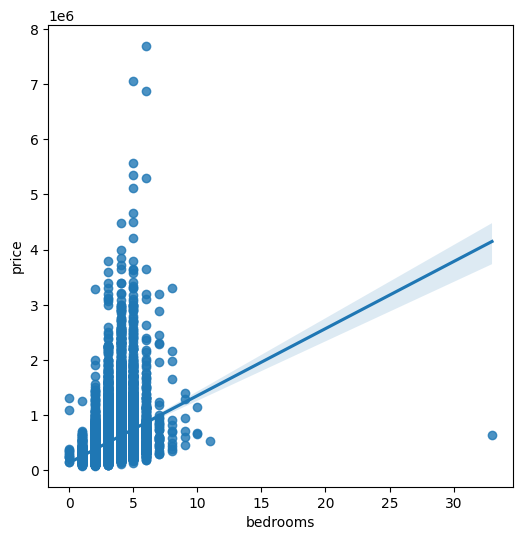

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='floors', ylabel='price'>

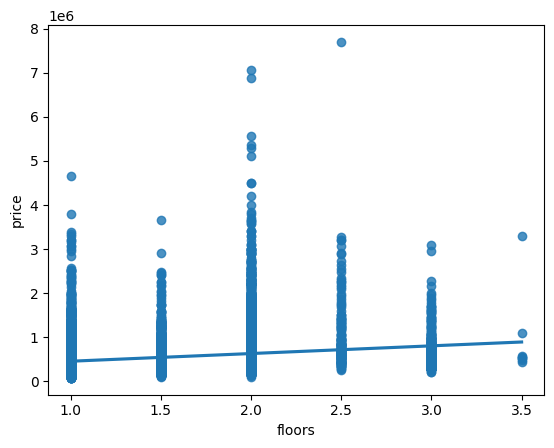

In [13]:
sns.regplot(x='floors',y='price',data=df)

C:\Users\Rites\AppData\Local\Temp\ipykernel_8092\376484995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],kde=False)


Text(0, 0.5, 'freq')

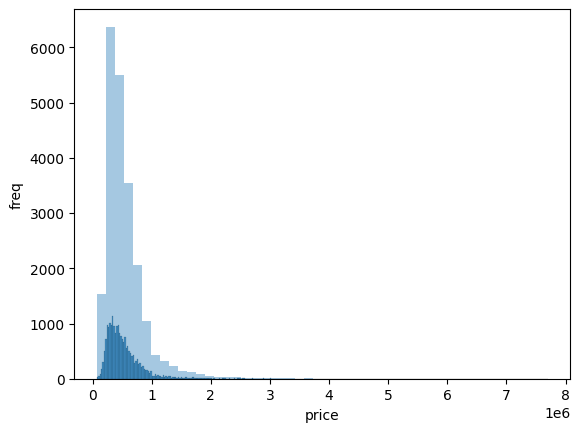

In [14]:
sns.histplot(df['price'],kde=False)
sns.distplot(df['price'],kde=False)
plt.xlabel('price')
plt.ylabel('freq')

In [15]:
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
target='price'

In [16]:
X=df[features]
y=df[target]

In [17]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


In [18]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Model Selection

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
#Scaling a data

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)
y_pred

array([ 482334.83033835,  723740.07091254,  960917.94523697, ...,
        530072.14305494, 1308411.45121886,  375378.52217598])

In [28]:
score=model.score(X_test,y_test)

In [29]:
print("Model R^2 Score::",score)

Model R^2 Score:: 0.5147557985732261


In [30]:
new_house = pd.DataFrame({'bedrooms': [3], 'bathrooms': [2.5], 'sqft_living': [250], 'sqft_lot': [300], 'floors': [2], 'zipcode': [98008]})
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 3080525706.57255


C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Prediction With the Help of SVM model

In [31]:

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SV = svm.SVR()
model_SV.fit(X_train,y_train)
Y_pred = model_SV.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, y_pred))

0.3383556216436819


In [32]:
new_house = pd.DataFrame({'bedrooms': [3], 'bathrooms': [2.5], 'sqft_living': [250], 'sqft_lot': [300], 'floors': [2], 'zipcode': [98008]})
predicted_price = model_SV.predict(new_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 450690.3111938878


C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
